# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [ ]:
install.packages("Rtsne")

In [50]:
library(tidyverse)

library(Rtsne)

## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [51]:
wine <- read.csv("/content/wine.csv")
glimpse(wine)
summary(wine)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [52]:
centered <- wine %>% mutate(across(-class, ~as.numeric(scale(.)))) %>%
  select(-class)

head(centered)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,X0D280_0D315_of_diluted_wines,Proline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939
2,0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635
3,0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370
4,1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680
5,0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747
6,1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072


It is importatnt to have the values in the data set standardized for PCA to ensure that numerical scale of certain columns do not overly influence the analysis.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


a)

In [53]:
wine_pca <- prcomp(centered)
summary(wine_pca)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

b) We use summary to view this information. PC1 explains 36% of the total variance and PC2 explains 19% of the total variance.

c) We are doing PCA first because it reduces the data set to its principle components. Having only the principle components makes analysis and visualization easier in 2D or 3D spaces.

d)

In [54]:
print(wine_pca$rotation)

                                       PC1          PC2         PC3         PC4
Alcohol                       -0.144329395 -0.483651548 -0.20738262 -0.01785630
Malicacid                      0.245187580 -0.224930935  0.08901289  0.53689028
Ash                            0.002051061 -0.316068814  0.62622390 -0.21417556
Alcalinity_of_ash              0.239320405  0.010590502  0.61208035  0.06085941
Magnesium                     -0.141992042 -0.299634003  0.13075693 -0.35179658
Total_phenols                 -0.394660845 -0.065039512  0.14617896  0.19806835
Flavanoids                    -0.422934297  0.003359812  0.15068190  0.15229479
Nonflavanoid_phenols           0.298533103 -0.028779488  0.17036816 -0.20330102
Proanthocyanins               -0.313429488 -0.039301722  0.14945431  0.39905653
Color_intensity                0.088616705 -0.529995672 -0.13730621  0.06592568
Hue                           -0.296714564  0.279235148  0.08522192 -0.42777141
X0D280_0D315_of_diluted_wines -0.3761674

e) Plot PC1 vs. PC2, using the wine class as labels for coloring.
Hint: You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a mutate() statement. Then, you can use color = factor(class) in your ggplot statement.

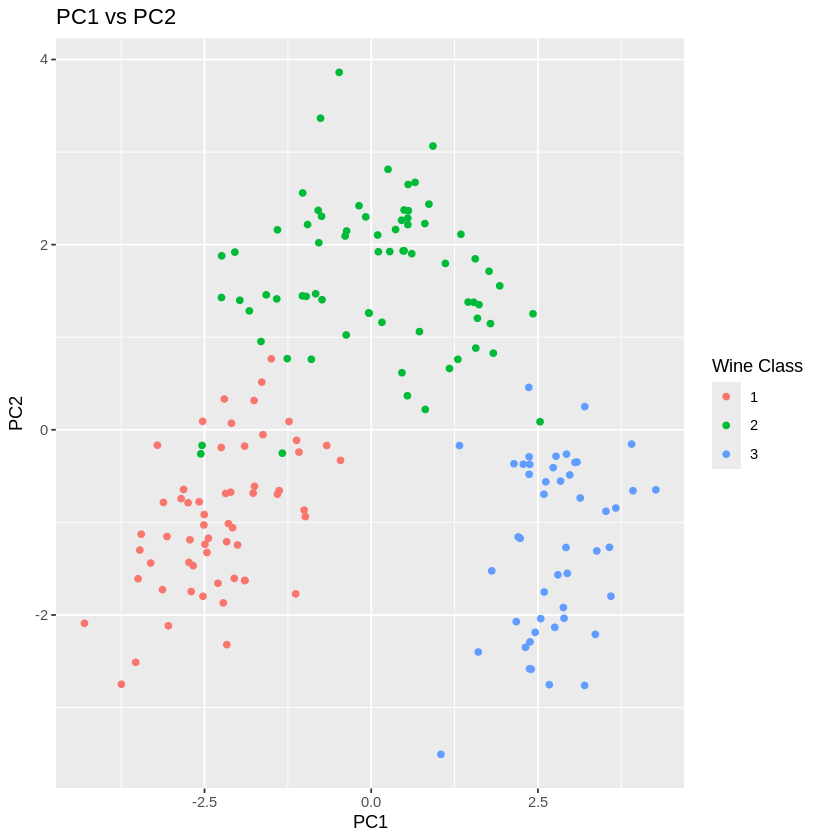

In [55]:
pca_scores <- as.data.frame(wine_pca$x) %>%
  mutate(class = wine$class)

pca_scores %>% ggplot(aes(x = PC1, y = PC2, color = factor(class)))+
  geom_point()+
    labs(
      title = "PC1 vs PC2",
      color = "Wine Class"
    )

f) I can see that there are 3 distinct groups of points with minimal overlap for the 3 wine classes. This means that the chemical make up of the wines is different enough that the PCA can distinguish between the classes. This means that the data set should be suitable for classification modeling.

g) PCA fails when the data has a non linear structure. An example of this would be a data set that has data in a donut shape.

h) A vector space is a flat, Euclidean space where any linear combination of vectors stays within the space. A manifold can be non linear or curved, but if you zoom in on a patch it looks like a vector space. While PCA only works in vector spaces, T-SNE is designed to deal with data that may lie on a non linear manifold. T-SNE is good at flattening these non linear manifolds so we can visualize them.

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



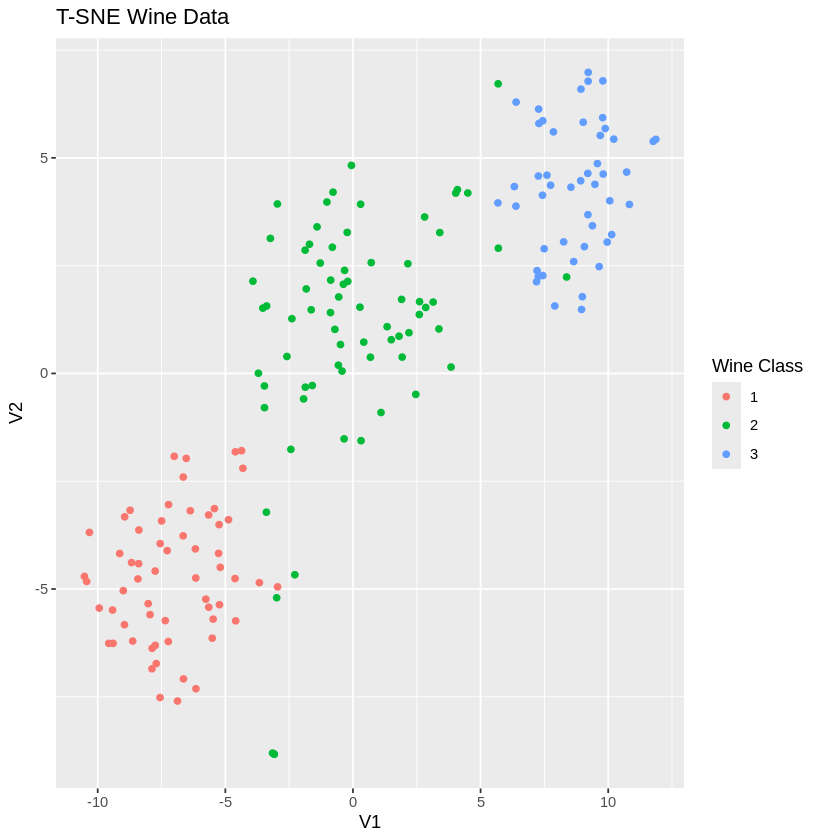

In [67]:
set.seed(123)

pca_sub <- pca_scores %>%
  select(PC1:PC10) %>%
    mutate(class = wine$class)

pca_sub_nodup <- pca_sub %>%
  distinct()

tsne <- Rtsne(as.matrix(pca_sub_nodup %>% select(-class)),
dims = 2, perplexity = 30)

tsne_df <- as.data.frame(tsne$Y) %>% mutate(class = pca_sub_nodup$class)

ggplot(data = tsne_df, aes(x = V1, y = V2, color = factor(class)))+
  geom_point() +
  labs(
    title = "T-SNE Wine Data",
    color = "Wine Class"
  )



c) We did not stop at PCA because if there were non linear structures in the data that PCA would miss. This gives a better picture of the non linear structures in the data

d) This workflow makes sense for data sets with high dimensionality, like neuroimaging data and genomics data.